In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data

### CIFAR 10


In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_images.shape

(50000, 32, 32, 3)

In [16]:
train_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

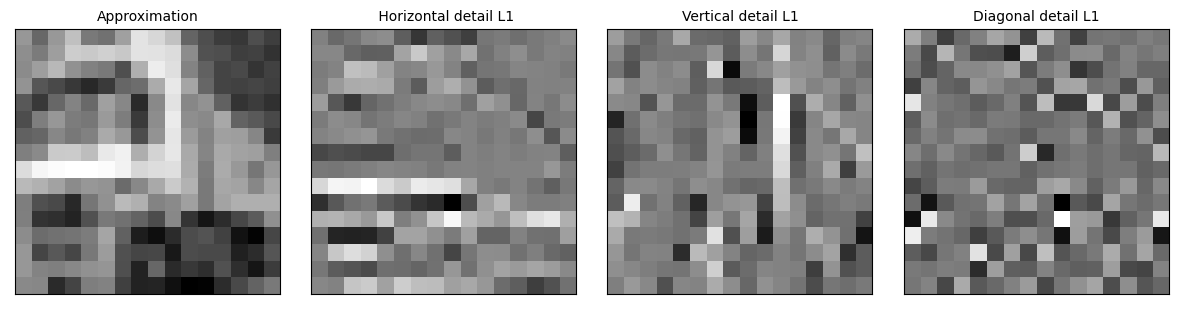

In [17]:
titles = [  'Approximation', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']

db1= pywt.dwt2(train_images_grayscale[1], 'db1')
LL, (LH, HL, HH) = db1
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()



In [50]:
len(train_images_grayscale)

50000

In [51]:
train_images_dwt2 = np.empty(shape=(50000,16,16))
test_images_dwt2 = np.empty(shape=(10000,16,16))

for i in range(len(train_images_grayscale)):
    db4 = pywt.dwt2(train_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    train_images_dwt2[i] = LL

for i in range(len(test_images_grayscale)):
    db4 = pywt.dwt2(test_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    test_images_dwt2[i] = LL

In [71]:
xTrain = np.reshape(train_images_dwt2, (train_images_dwt2.shape[0], -1))
xTest= np.reshape(test_images_dwt2, (test_images_dwt2.shape[0], -1))

xTrain_org = np.reshape(train_images_grayscale, (train_images_grayscale.shape[0], -1))
xTest_org = np.reshape(test_images_grayscale, (test_images_grayscale.shape[0], -1))
yTrain = train_labels.flatten()
yTest = test_labels.flatten()

In [13]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [14]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=21),
    SVC()  
]


In [75]:
def train_test(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [13]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.26594999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.268125
Model:  NearestCentroid()
Średnia dokłądności:  0.2538250000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25572500000000004
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24102499999999996
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25559999999999994
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2579
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.259125


In [14]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27105000000000007
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.2699
Model:  NearestCentroid()
Średnia dokłądności:  0.250675
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.25329999999999997
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.24207499999999998
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.25112500000000004
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.2561
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.26209999999999994


In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = train_test(i,test_sample, xTest_org, yTest)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27054999999999996
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.21152500000000002
Model:  NearestCentroid()
Średnia dokłądności:  0.25272500000000003
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.242825
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.23325
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.24245
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.24907500000000002
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.2434


Model:  GaussianNB()
Model:  LinearDiscriminantAnalysis()
Model:  NearestCentroid()
Model:  KNeighborsClassifier(n_neighbors=1)
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Model:  KNeighborsClassifier()
Model:  KNeighborsClassifier(n_neighbors=7)
Model:  KNeighborsClassifier(n_neighbors=21)


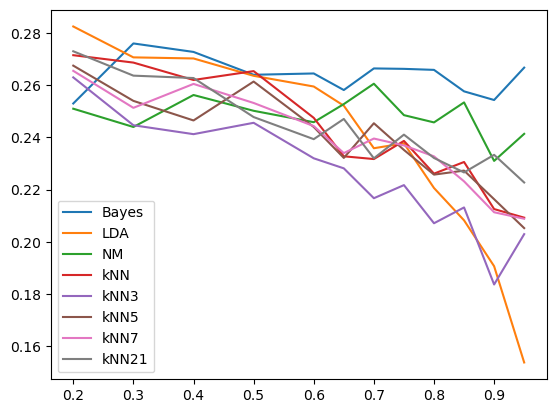

In [16]:
test_sample = [0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in classifiers:
    print('Model: ',i)
    accPoints = []
    acc = 0
    for j in test_sample:
        model = i
        predicted, X_test, y_test = train_test(i,j, xTest, yTest)
        acc = metrics.accuracy_score(y_test, predicted)
        # print('Dokładność dla próbki: ',j,'wynosi: ',acc)
        accPoints.append(acc)
    plt.plot(test_sample, accPoints)
    plt.grid()
    plt.legend(['Bayes','LDA','NM','kNN','kNN3','kNN5','kNN7','kNN21'])

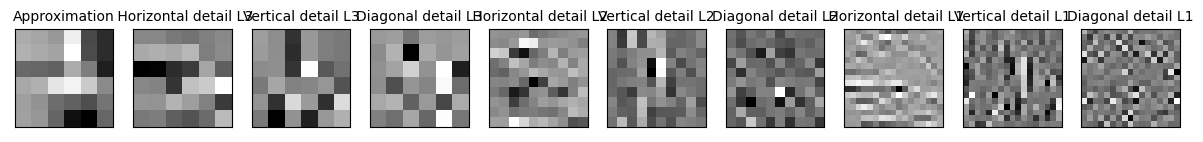

(6, 6)

In [17]:
titles = [  'Approximation', ' Horizontal detail L3',
            'Vertical detail L3', 'Diagonal detail L3',
            ' Horizontal detail L2','Vertical detail L2',
            'Diagonal detail L2', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
db2 = pywt.wavedec2(train_images_grayscale[1], 'db2')
LL3,(LH3, HL3, HH3),(LH2, HL2, HH2) , (LH, HL, HH) = db2
fig = plt.figure(figsize=(12, 10))
for i, a in enumerate([LL3, LH3, HL3, HH3,LH2, HL2, HH2,LH, HL, HH]):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []

LH3.shape

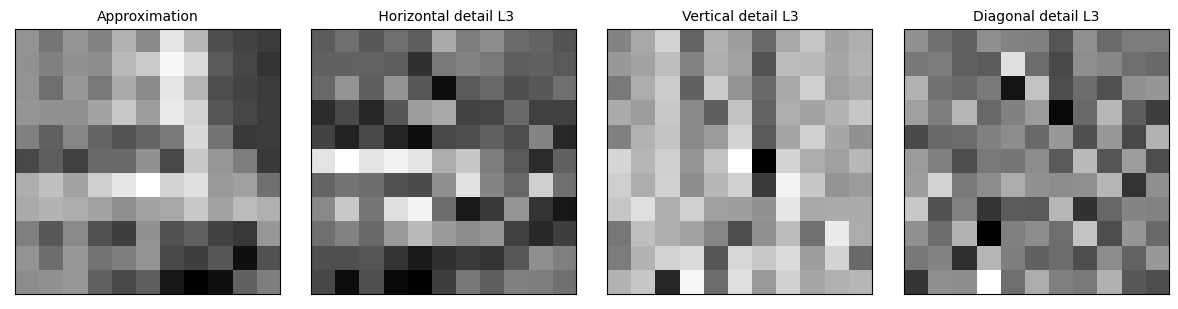

(11, 11)

In [18]:
titles = [  'Approximation', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2', 
            ' Horizontal detail L1','Vertical detail L1',
            'Diagonal detail L1']
db3 = pywt.wavedec2(train_images_grayscale[1], 'db3')
LL2,(LH2, HL2, HH2) , (LH, HL, HH) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []
LL2.shape

### Test

In [19]:
test_sample = 0.4
xTrain_orgrgb = np.reshape(train_images, (train_images.shape[0], -1))

xTrain_orgrgb.shape


(50000, 3072)

In [ ]:
for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted = train_test(i, xTrain_org, xTest_org)
      sumAcc += metrics.accuracy_score(yTest, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

### MNIST


In [2]:
from datasets import load_dataset

dataset = load_dataset("mnist")

Found cached dataset mnist (C:/Users/krojc/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [4]:
X_test_mnist = np.empty(shape=(10000,28,28))
y_test_mnist = np.empty(shape=(10000))
X_train_mnist = np.empty(shape=(60000,28,28))
y_train_mnist = np.empty(shape=(60000))

# X = np.array(dataset['train'][1]['image'])
for i in range(60000):
    X_train_mnist[i] = np.array(dataset['train'][i]['image'])
    y_train_mnist[i] = np.array(dataset['train'][i]['label'])
for i in range(10000):
    X_test_mnist[i] = np.array(dataset['test'][i]['image'])
    y_test_mnist[i] = np.array(dataset['test'][i]['label'])


In [5]:
xTrain_mnist = np.reshape(X_train_mnist, (X_train_mnist.shape[0], -1))
xTest_mnist = np.reshape(X_test_mnist, (X_test_mnist.shape[0], -1))

y_train_mnist = np.array(y_train_mnist, dtype=int)
y_test_mnist = np.array(y_test_mnist, dtype=int)

In [6]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5781500000000002
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8547
Model:  NearestCentroid()
Średnia dokłądności:  0.8215
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9459250000000001
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.943875
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.94215
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9403749999999998
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9232000000000001
Model:  SVC()
Średnia dokłądności:  0.9587249999999999


### Haar

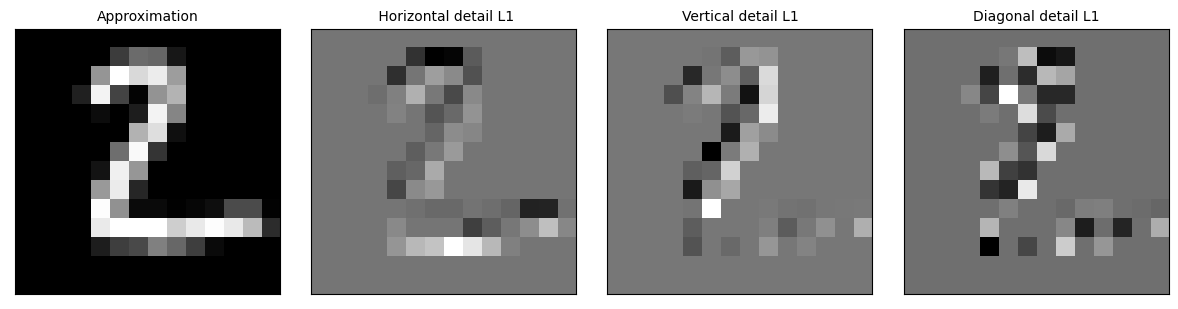

(14, 14)

In [44]:
titles = [  'Approximation', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
haar= pywt.dwt2(X_test_mnist[1], 'db1')

LL,((LH, HL, HH)) = haar
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

LL.shape

In [18]:
train_images_haar = np.empty(shape=(60000,14,14))
test_images_haar = np.empty(shape=(10000,14,14))

for i in range(len(X_train_mnist)):
    db_haar_mnist_train = pywt.dwt2(X_train_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar[i] = LL

for i in range(len(X_test_mnist)):
    db_haar_mnist_test = pywt.dwt2(X_test_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar[i] = LL

In [19]:
xTrain_mnist_haar = np.reshape(train_images_haar, (train_images_haar.shape[0], -1))
xTest_mnist_haar = np.reshape(test_images_haar, (test_images_haar.shape[0], -1))

In [20]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5865750000000001
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.87035
Model:  NearestCentroid()
Średnia dokłądności:  0.8155000000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9541000000000001
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.95325
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9498999999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.947575
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.931
Model:  SVC()
Średnia dokłądności:  0.9595499999999999


In [55]:
train_images_haar_2 = np.empty(shape=(60000,7,7))
test_images_haar_2 = np.empty(shape=(10000,7,7))

for i in range(len(train_images_haar)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_2[i] = LL

for i in range(len(test_images_haar)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_2[i] = LL

In [56]:
xTrain_mnist_haar_2 = np.reshape(train_images_haar_2, (train_images_haar_2.shape[0], -1))
xTest_mnist_haar_2 = np.reshape(test_images_haar_2, (test_images_haar_2.shape[0], -1))

In [57]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.46167500000000006
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8504750000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.7834499999999999
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.928125
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.931175
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9329749999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9294999999999998
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9131499999999999
Model:  SVC()
Średnia dokłądności:  0.9424999999999999


In [58]:
train_images_haar_3 = np.empty(shape=(60000,4,4))
test_images_haar_3 = np.empty(shape=(10000,4,4))

for i in range(len(train_images_haar_2)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_3[i] = LL

for i in range(len(test_images_haar_2)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_3[i] = LL

In [59]:
xTrain_mnist_haar_3 = np.reshape(train_images_haar_3, (train_images_haar_3.shape[0], -1))
xTest_mnist_haar_3 = np.reshape(test_images_haar_3, (test_images_haar_3.shape[0], -1))

In [60]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.3756
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.6668499999999999
Model:  NearestCentroid()
Średnia dokłądności:  0.5417749999999999
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.7015
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.721225
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.7372249999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.74055
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.73795
Model:  SVC()
Średnia dokłądności:  0.769975


### DB2

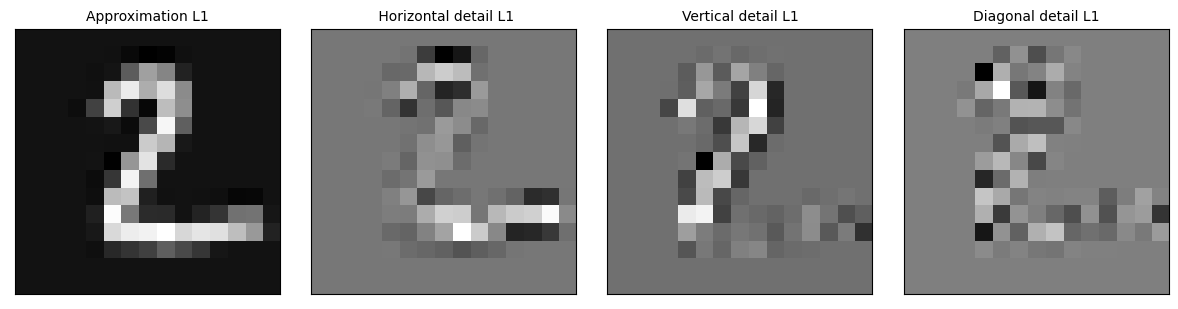

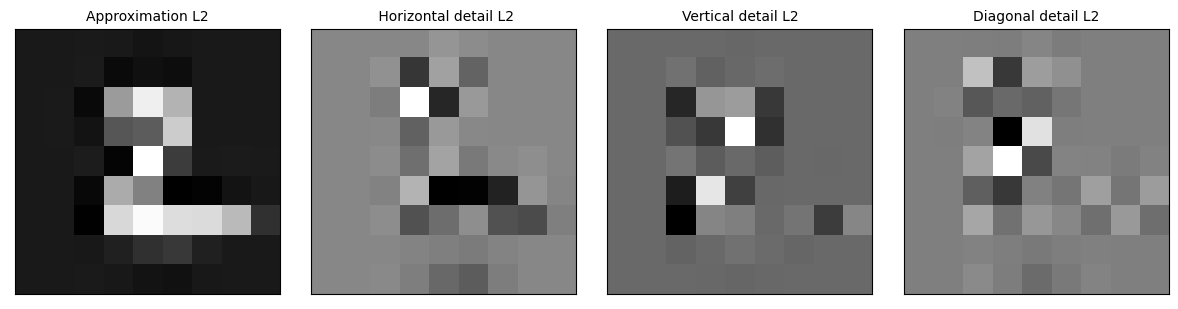

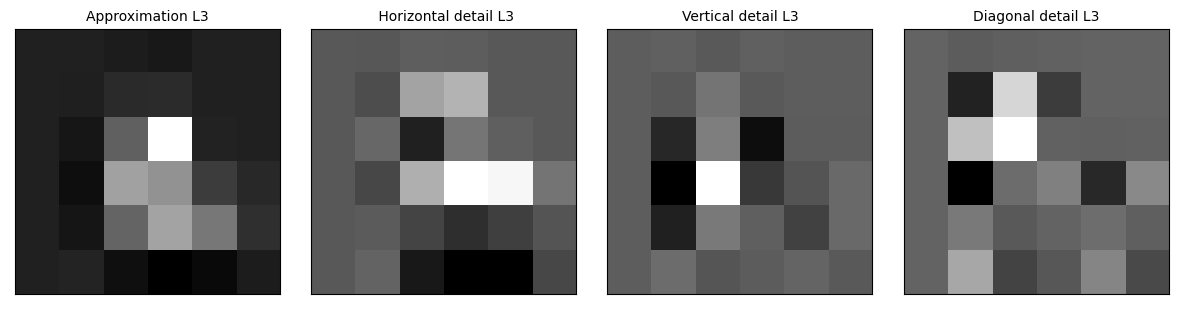

(15, 15) (9, 9) (6, 6)


In [7]:
titles = [  'Approximation L1', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
db2= pywt.dwt2(X_test_mnist[1], 'db2')

LL,((LH, HL, HH)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


titles = [  'Approximation L2', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2']
db2= pywt.dwt2(LL, 'db2')

LL1,((LH1, HL1, HH1)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1,LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
titles = [  'Approximation L3', ' Horizontal detail L3',
            'Vertical detail L3','Diagonal detail L3']
db2= pywt.dwt2(LL1, 'db2')

LL2,((LH2, HL2, HH2)) = db2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

print(LL.shape,LL1.shape,LL2.shape)



In [8]:
train_images_db2 = np.empty(shape=(60000,15,15))
test_images_db2 = np.empty(shape=(10000,15,15))

for i in range(len(X_train_mnist)):
    db_2_mnist_train = pywt.dwt2(X_train_mnist[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2[i] = LL

for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2[i] = LL

In [9]:
xTrain_mnist_db2 = np.reshape(train_images_db2, (train_images_db2.shape[0], -1))
xTest_mnist_db2 = np.reshape(test_images_db2, (test_images_db2.shape[0], -1))

In [75]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5975500000000001
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.87005
Model:  NearestCentroid()
Średnia dokłądności:  0.819525
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.95275
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9531749999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.952125
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9482500000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9301000000000001
Model:  SVC()
Średnia dokłądności:  0.9609


### DB2 L2

In [10]:
train_images_db2_2 = np.empty(shape=(60000,9,9))
test_images_db2_2 = np.empty(shape=(10000,9,9))

for i in range(len(train_images_db2)):
    db_2_mnist_train = pywt.dwt2(train_images_db2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2_2[i] = LL

for i in range(len(test_images_db2)):
    db_2_mnist_test = pywt.dwt2(test_images_db2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2_2[i] = LL

In [11]:
xTrain_mnist_db2_2 = np.reshape(train_images_db2_2, (train_images_db2_2.shape[0], -1))
xTest_mnist_db2_2 = np.reshape(test_images_db2_2, (test_images_db2_2.shape[0], -1))

In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5631999999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.84595
Model:  NearestCentroid()
Średnia dokłądności:  0.77835
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9273000000000001
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.933425
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9316249999999998
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9301750000000002
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.912725
Model:  SVC()
Średnia dokłądności:  0.9427249999999999


### DB2 L3

In [17]:
train_images_db2_3 = np.empty(shape=(60000,6,6))
test_images_db2_3 = np.empty(shape=(10000,6,6))

for i in range(len(train_images_db2_2)):
    db_2_mnist_train = pywt.dwt2(train_images_db2_2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db2_3[i] = LL

for i in range(len(test_images_db2_2)):
    db_2_mnist_test = pywt.dwt2(test_images_db2_2[i], 'db2')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db2_3[i] = LL

In [18]:
xTrain_mnist_db2_3 = np.reshape(train_images_db2_3, (train_images_db2_3.shape[0], -1))
xTest_mnist_db2_3 = np.reshape(test_images_db2_3, (test_images_db2_3.shape[0], -1))

In [19]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db2_3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.6302999999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.76475
Model:  NearestCentroid()
Średnia dokłądności:  0.5972
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.77455
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.7909750000000001
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.80135
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.8043000000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7890249999999999
Model:  SVC()
Średnia dokłądności:  0.8236999999999999


### DB3

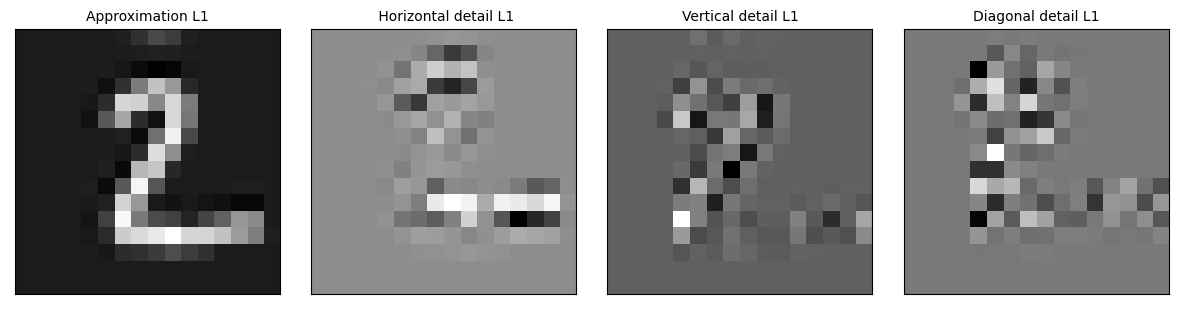

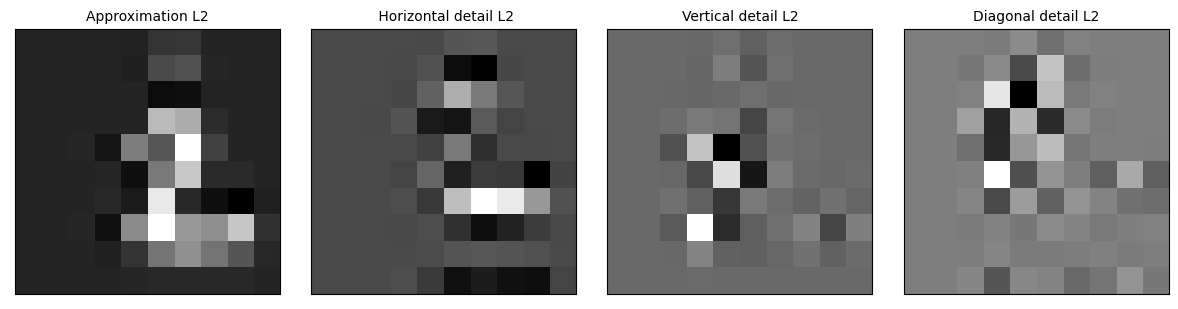

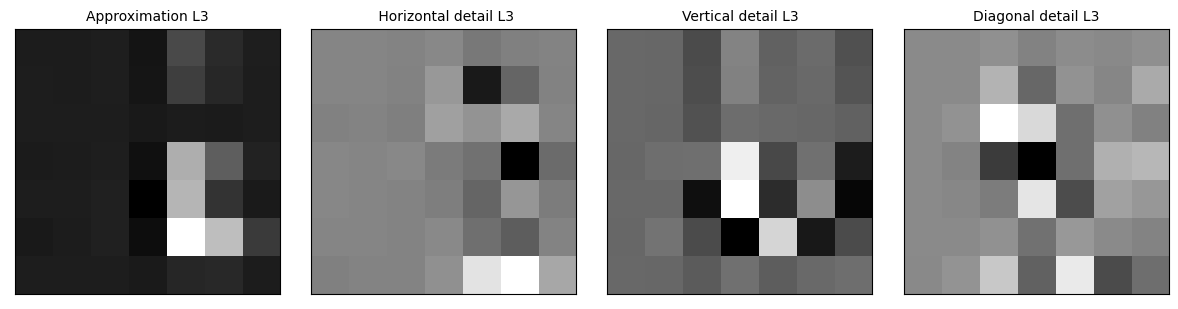

(16, 16) (10, 10) (7, 7)


In [20]:
titles = [  'Approximation L1', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']

db3= pywt.dwt2(X_test_mnist[1], 'db3')

LL,((LH, HL, HH)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

titles = [  'Approximation L2', ' Horizontal detail L2',
            'Vertical detail L2','Diagonal detail L2']
db3= pywt.dwt2(LL, 'db3')

LL1,((LH1, HL1, HH1)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1,LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

titles = [  'Approximation L3', ' Horizontal detail L3',
            'Vertical detail L3','Diagonal detail L3']

db3= pywt.dwt2(LL1, 'db3')

LL2,((LH2, HL2, HH2)) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

print(LL.shape,LL1.shape,LL2.shape)

### L1

In [21]:
train_images_db3 = np.empty(shape=(60000,16,16))
test_images_db3 = np.empty(shape=(10000,16,16))

for i in range(len(X_train_mnist)):
    db_2_mnist_train = pywt.dwt2(X_train_mnist[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3[i] = LL

for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3[i] = LL

In [22]:
xTrain_mnist_db3 = np.reshape(train_images_db3, (train_images_db3.shape[0], -1))
xTest_mnist_db3 = np.reshape(test_images_db3, (test_images_db3.shape[0], -1))

In [23]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5343
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8676250000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.8182750000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9530999999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9503999999999998
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9522999999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.948275
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.931875
Model:  SVC()
Średnia dokłądności:  0.9625749999999998


### L2

In [24]:
train_images_db3_2 = np.empty(shape=(60000,10,10))
test_images_db3_2 = np.empty(shape=(10000,10,10))

for i in range(len(train_images_db3)):
    db_2_mnist_train = pywt.dwt2(train_images_db3[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3_2[i] = LL

for i in range(len(test_images_db3)):
    db_2_mnist_test = pywt.dwt2(test_images_db3[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3_2[i] = LL

In [25]:
xTrain_mnist_db3_2 = np.reshape(train_images_db3_2, (train_images_db3_2.shape[0], -1))
xTest_mnist_db3_2 = np.reshape(test_images_db3_2, (test_images_db3_2.shape[0], -1))

In [26]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5784750000000001
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.84755
Model:  NearestCentroid()
Średnia dokłądności:  0.787575
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9346749999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9360000000000002
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9361749999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.93735
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.922175
Model:  SVC()
Średnia dokłądności:  0.9429000000000001


### L3

In [28]:
train_images_db3_3 = np.empty(shape=(60000,7,7))
test_images_db3_3 = np.empty(shape=(10000,7,7))

for i in range(len(train_images_db3_2)):
    db_2_mnist_train = pywt.dwt2(train_images_db3_2[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_train
    train_images_db3_3[i] = LL

for i in range(len(test_images_db3_2)):
    db_2_mnist_test = pywt.dwt2(test_images_db3_2[i], 'db3')
    LL, (LH, HL, HH) = db_2_mnist_test
    test_images_db3_3[i] = LL

In [29]:
xTrain_mnist_db3_2 = np.reshape(train_images_db3_3, (train_images_db3_3.shape[0], -1))
xTest_mnist_db3_2 = np.reshape(test_images_db3_3, (test_images_db3_3.shape[0], -1))

In [30]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_db3_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.558925
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.7898999999999999
Model:  NearestCentroid()
Średnia dokłądności:  0.5615249999999999
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.7370249999999999
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.750975
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.76245
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.7663500000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7513750000000001
Model:  SVC()
Średnia dokłądności:  0.7943250000000002


### Haar with whole decomposition

In [126]:
images_haar_full = np.empty(shape=(10000,56,14))
images_haar_LL = np.empty(shape=(10000,14,14))
images_haar_details = np.empty(shape=(10000,588))


for i in range(len(X_test_mnist)):
    db_2_mnist_test = pywt.dwt2(X_test_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_2_mnist_test
    images_haar_full[i] = np.concatenate((LL,LH,HL,HH))
    images_haar_LL[i] = LL
    images_haar_details[i] = np.concatenate((LH,HL,HH), axis=None)

In [107]:
Data_mnist_haar_full = np.reshape(images_haar_full, (images_haar_full.shape[0], -1))


In [74]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, Data_mnist_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5843750000000001
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.855825
Model:  NearestCentroid()
Średnia dokłądności:  0.8163500000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9455500000000001
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.944875
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9400999999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9403749999999998
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9228999999999999
Model:  SVC()
Średnia dokłądności:  0.959075


In [106]:
images_haar_details[1].shape

(42, 14)

In [122]:
images_haar_full_2 = np.empty(shape=(10000,196))
images_haar_full = np.empty(shape=(10000,784))
images_haar_LL_2 = np.empty(shape=(10000,7,7))
images_haar_details_2 = np.empty(shape=(10000,147))

for i in range(len(images_haar_LL)):
    db_2_mnist_test = pywt.dwt2(images_haar_LL[i], 'db1')
    LL2, (LH2, HL2, HH2) = db_2_mnist_test
    images_haar_full_2[i] = np.concatenate((LL2,LH2,HL2,HH2), axis=None)
    images_haar_full[i] = np.concatenate((images_haar_full_2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_2[i] = np.concatenate((LH2,HL2,HH2), axis=None)

In [84]:
images_haar_full_L2 = np.reshape(images_haar_full_2, (images_haar_full_2.shape[0], -1))
images_haar_details_L1 = np.reshape(images_haar_details, (images_haar_details.shape[0], -1))

print(images_haar_full_L2.shape, images_haar_details_L1.shape)

(10000, 196) (10000, 588)


In [110]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5418999999999999
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8524750000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.8204749999999998
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9462249999999999
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.945225
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9428750000000001
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9396000000000001
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.922025
Model:  SVC()
Średnia dokłądności:  0.957675


In [128]:
images_haar_full_3 = np.empty(shape=(10000,196))
images_haar_full_L2 = np.empty(shape=(10000,343))
images_haar_full = np.empty(shape=(10000, 931))
images_haar_LL_3 = np.empty(shape=(10000,7,7))
images_haar_details_3 = np.empty(shape=(10000,21,7))

for i in range(len(images_haar_LL)):
    db_3_mnist_test = pywt.dwt2(images_haar_LL[i], 'db1')
    LL3, (LH3, HL3, HH3) = db_3_mnist_test
    images_haar_full_3[i] = np.concatenate((LL3,LH3,HL3,HH3), axis=None)
    images_haar_full_L2[i] = np.concatenate((images_haar_full_3[i],images_haar_details_2[i]), axis=0)
    images_haar_full[i] = np.concatenate((images_haar_full_L2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_3[i] = np.concatenate((LH2,HL2,HH2))

In [129]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.528225
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.854875
Model:  NearestCentroid()
Średnia dokłądności:  0.8118000000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9450499999999998
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9416
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9415749999999999
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9381750000000002
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.9190250000000001
Model:  SVC()
Średnia dokłądności:  0.9577
